$
\newcommand{\R}{\mathbb{R}}
\newcommand{\C}{\mathbb{C}}
\newcommand{\i}{\mathrm{i}}
%
\newcommand{\HP}{\mathcal{H}_P}
\newcommand{\HM}{\mathcal{H}_M}
\newcommand{\UP}{\mathcal{U}_P}
\newcommand{\UM}{\mathcal{U}_M}
%
\newcommand{\RX}{\mathrm{RX}}
\newcommand{\RZ}{\mathrm{RZ}}
\newcommand{\RZZ}{\mathrm{RZZ}}
\newcommand{\CX}{\mathrm{CX}}
\newcommand{\CNOT}{\mathrm{CNOT}}
\newcommand{\X}{\mathrm{X}}
\newcommand{\SX}{\mathrm{\sqrt{X}}}
\newcommand{\SWAP}{\mathrm{SWAP}}
%
\newcommand{\ket}[1]{\left\vert #1 \right\rangle}
\newcommand{\bra}[1]{\left\langle #1 \right\vert}
\newcommand{\braket}[1]{\left\langle #1 \right\rangle}
\newcommand{\pmat}[1]{\begin{pmatrix}#1\end{pmatrix}}
$

---

***This notebook is part of the project [SEQUOIA](https://websites.fraunhofer.de/sequoia/) of the [Competence Center Quantum Computing Baden-Württemberg](https://www.iaf.fraunhofer.de/en/networkers/KQC.html).***

---

<img src="images/sequoia_logo.png" />

<br>
<br>

# SEQUOIA DEMONSTRATOR  <a class="tocSkip"/>

## Energy Use Case: Optimization of Charging Schedules for Electric Cars  <a class="tocSkip"/>


***Author: Dr. Andreas Sturm, Fraunhofer IAO, andreas.sturm@iao.fraunhofer.de***

---
# Notebook 4 <a class="tocSkip"/>
---

# Introduction

In Notebook 1 we presented a real-world use case for optimizing charging schedules for electric cars, reduced it to a proof of concept model, and transformed it to a QUBO. Then, in Notebook 2 we presented the quantum algorithm QAOA and how the associated quantum circuits can be obtained. Subsequently, in Notebook 3 we explained how these quantum circuits can be transpiled and run on real quantum computers, and how the results of such experiments can be postprocessed. Building on this pipeline one can build a **series of experiments** in order to **study how good quantum computing** (with all its **limitations** in the current **NISQ era**) can be employed **for our charging schedule optimization use case**. It is exactly a series of such experiments that we will present in this notebook.

*Note: Our main aim with this notebook is to provide and discuss results from quantum computing experiments. In order to keep this notebook at a reasonable scope we thus don't provide the detailed codes but only give the most important parts of them. Together with the knowledge of the previous notebooks the reader should be able to develop codes by him/herself (if this is desired)*

We begin with introducing the two example series on which all our experiments will be based.

# Examples for this Notebook

For all examples in this notebook we consider **1 charging station** with **4 charging levels** and **4 available time slots**.

## Example Series 1
As a first series of examples (denoted by example1pX, X=0, 1, 2 or 3) we assume that **1 car** is at the charging station and needs to **charge 4 energy units**. The **examples differ** in the **duration** that the car is **at the charging station**, namely
- example1p0 $\to$ car is at charging station at time slot 0
- example1p1 $\to$ car is at charging station at time slots 0, 1
- example1p2 $\to$ car is at charging station at time slots 0, 1, 2
- example1p3 $\to$ car is at charging station at time slots 0, 1, 2, 3

<img src="images/notebook_4_example_1.png" width=450 />

## Example Series 2

Our second series of examples (denoted by example2pX, X=0, 1, 2, 3 or 4) considers the situation where **2 cars** are at the charging station and **both** need to **charge 4 energy units**. Again, the **examples differ** in the **duration** that the cars are **at the charging station**, namely
- example2p0 $\to$ time slots green car: 0, time slots orange car: 1
- example2p1 $\to$ time slots green car: 0, 1, time slots orange car: 1, 2
- example2p2 $\to$ time slots green car: 0, 1, 2 time slots orange car: 1, 2, 3
- example2p3 $\to$ time slots green car: 0, 1, 2, 3 time slots orange car: 1, 2, 3
- example2p4 $\to$ time slots green car: 0, 1, 2, 3 time slots orange car: 0, 1, 2, 3

<img src="images/notebook_4_example_2.png" width=450 />

Our first experiments are concerend with the classical optimization part of QAOA.

# Classical Optimization

Recall from Notebook 2 that we want to find parameters $\vec{\beta}$ and $\vec{\gamma}$ such that the expectation value $e$, given by

$$
e(\vec{\beta}, \vec{\gamma})
=
\langle \psi_\mathrm{QAOA}(\vec{\beta}, \vec{\gamma}) | \HP |\psi_\mathrm{QAOA}(\vec{\beta}, \vec{\gamma}) \rangle \ ,
$$

is minimized. I.e. we search for $\vec{\beta}^\ast$ and $\vec{\gamma}^\ast$ that satisfy

$$
(\vec{\beta}^\ast, \vec{\gamma}^\ast) 
= \mathrm{argmin}_{\vec{\beta}, \vec{\gamma}} e(\vec{\beta}, \vec{\gamma}) \ .
$$

## Optimization Landscape

For $p=1$ we only have **two parameters** $\beta_0$ and $\gamma_0$ so that the **expectation value** $e(\beta_0, \gamma_0)$ can be **visualized as a heatmap**. We have done this for the following setting
- We visualize the optimization landscape for parameters in the domain $[0, \pi] \times [0, 2 \pi]$. For this purpose we use a fine, equidistant discretization of $[0, \pi] \times [0, 2 \pi]$ into $100 \times 200$ gridpoints $(\beta_{0,j}, \gamma_{0,k})$, $j=0, \dots, 99$, $k=0, \dots, 199$.
- For every grid point $(\beta_{0,j}, \gamma_{0,k})$ we compute the expectation value $e(\beta_{0,j}, \gamma_{0,k})$. This gives a $100 \times 200$ matrix $E = (e(\beta_{0,j}, \gamma_{0,k}))_{j,k}$.
- For the transformation to a QUBO we use as value for the penalty $\varrho$ the minimum value such that the solution of (QUBO) is a solution of (QCIO).
- We use an exact state vector simulation to compute the expectation value.

In the following figures we see the results, where the **expectation value** $e(\beta_{0,j}, \gamma_{0,k})$ is **visualized** by the **color** of the point $(\beta_{0,j}, \gamma_{0,k})$ (see the colorscale in the plots).

<img src="images/optimization_landscape/ex1.png" width=800 />

<img src="images/optimization_landscape/ex2.png" width=800 />

We see that the optimization landscapes are fairly complicated with lots of **local extrema**. This indicates that it is a **hard task** for classical optimizers to find the **global minimum** (depending on the initial guess (=starting point) for a local optimizer it will get stuck in a local minimum). Moreover, we already can see that for the bigger examples gradients vanish, see further the so-called **barren plateaus** phenomenom.

In the next section we report results from a classical optimizer and will indeed experience that finding good parameters $\vec{\beta}$ and $\vec{\gamma}$ is difficult.

---
Code snippet:

```python
from joblib import Parallel, delayed
import plotly.graph_objects as go

beta_mesh = np.linspace(0, np.pi, beta_mesh_grid_points)
gamma_mesh = np.linspace(0, 2*np.pi, gamma_mesh_grid_points)
energies = Parallel(n_jobs=-1)(
    delayed(
        energy_evaluation # this was defined in Notebook 2
    )(
        [beta, gamma]
    ) for beta in beta_mesh for gamma in gamma_mesh 
)
energy_matrix = np.reshape(energies, (gamma_mesh.size, beta_mesh.size), order='F')

fig = go.Figure(
    data =
        go.Heatmap(
            z=np.real(energy_matrix),
            x=beta_mesh,
            y=gamma_mesh,
))
```
---

## Results with Optimizer COBYLA

For the now following results we used the **optimizer COBYLA**, [link](https://qiskit.org/documentation/stubs/qiskit.algorithms.optimizers.COBYLA.html#qiskit.algorithms.optimizers.COBYLA), to minimize $e(\vec{\beta}, \vec{\gamma})$ for QAOA with $p=1, 2$ and $3$. Moreover, we used
- $10$ different penalties $\varrho$ starting from the minimum that gives a feasible solution and advancing in $0.1$ steps.
- For every combination of $p$ and $\varrho$ we ran $50$ COBYLA minimizations with random initial guesses $\vec{\beta^{(0)}} \in [0, \pi]^p$, $\vec{\gamma^{(0)}} \in [0, 2\pi]^p$. The reamining COBYLA parameters where left by their default values.
- We used an exact state vector simulation to compute the expectation value.

We report the **expectation value $e(\vec{\beta^{\ast}}, \vec{\gamma^{\ast}})$** (termed $\mathrm{cost}$ in the figures) below, where **$\vec{\beta^{\ast}}$ and $\vec{\gamma^{\ast}}$** are the **result of the COBYLA minimization**:
$$
\text{random } \vec{\beta^{(0)}}, \vec{\gamma^{(0)}} \stackrel{\text{COBYLA}}{\rightsquigarrow} \vec{\beta^{\ast}}, \vec{\gamma^{\ast}}
$$ 
The **dashed line** in the plots corresponds to the **solution of the original minimization problem**, i.e. this is the value we try to reach with $e(\vec{\beta^{\ast}}, \vec{\gamma^{\ast}})$.

<img src="images/classical_optimization/example1p1.svg" />

<img src="images/classical_optimization/example1p3.svg" />

<img src="images/classical_optimization/example2p1.svg" />

<img src="images/classical_optimization/example2p4.svg" />

In general, we see a **strong dependency** (and thus a **high variance**) of the result of the optimization with the **choice of the initial values** $\vec{\beta^{(0)}}$ and $\vec{\gamma^{(0)}}$ (every dot in the upper figures corresponds to one random choice of the initial values). Comparing the simpler examples with the more complicated ones, i.e. $\mathrm{example1p1}$ with $\mathrm{example1p3}$ and $\mathrm{example2p1}$ with $\mathrm{example2p4}$, we observe a higher variance  and that QAOA with $p=1$ performs poorly for the more complicated problems (note the accumulation of results at very high expectation values).

Another observation is that a **higher parameter $p$** (as expected) **improves the quality of the QAOA solution**. In particuar, for example1p1 we observe that QAOA with $p=3$ yields expectation values near to the exact solution whereas QAOA with $p=1$ is bounded away from the exact solution for every initial choice $\vec{\beta^{(0)}}$ and $\vec{\gamma^{(0)}}$. 

In summary, we have seen that optimizing the parameters $\vec{\beta}$ and $\vec{\gamma}$ is indeed a difficult task. So, we can conclude that different optimizers should be tested and at least a few different initial values should be compared. We also observe that the choice of penalty plays a role but can hardly conclude a recommendation from the data.

With this we end our experiments that solely used a simulator. The **following sections** deal with **results from real quantum computers**. An important **first step** here is to **analyze the transpilation** of our QAOA circuits and the **number of basis gates** (i.e. the number of gates that the quantum computing device natively supports) it requires in order to evaluate how well it can be executed on NISQ computers.

# Analysis of Transpiled QAOA Circuit

In Notebook 1 we already saw a sparsity plot of the QUBO matrix. Now, we explain how the sparsity pattern affects the transpilation of the QAOA circuit associated with the QUBO.

## Sparsity of QUBO Matrix and Number of $\RZZ$ Gates

Recall from Notebook 1 and Notebook 2 the QUBO cost function

$$
\begin{equation}
f_3(\vec{b})
= \vec{b}^T A \vec{b} + L \vec{b} + c
= \sum_{i=0}^{n-1} \sum_{j>i}^{n-1} a_{ij} b_i b_j
+ \sum_{i=0}^{n-1} l_i b_i 
+ c \ ,
\end{equation}
$$

and that the transformation $b_i \leftrightarrow \tfrac12 \bigl( I^{\otimes n} - \sigma_Z^{(i)} \bigr)$ gave us the cost Hamiltonian

$$
\HP = \sum_{i=0}^{n-1} \sum_{j>i}^{n-1} h_{ij} \sigma_Z^{(i)} \sigma_Z^{(j)}
+ \sum_{i=0}^{n-1} h_i' \sigma_Z^{(i)}
+ h'' I^{\otimes n} \ .
$$

Moreover, recall the mixing and the phase operators

$$
\UM(\beta)
= \mathrm{exp}(- \mathrm{i} \beta \HM),
\qquad \text{and} \qquad
\UP(\gamma) 
=  \mathrm{exp}(- \mathrm{i} \gamma \HP) \ ,
$$

respetively, as well as the gates needed to implement them:

$$
\UM(\beta)
= \RX_0(2 \beta) \RX_1(2 \beta) \cdots \RX_{n-1}(2 \beta) \ ,
$$

$$
\UP(\gamma) 
= \RZZ_{0,1}(2 \gamma h_{01}) \RZZ_{0,2}(2 \gamma h_{02}) \cdots \RZZ_{n-2,n-1}(2 \gamma h_{n-2,n-1})
\ 
\RZ_0(2\gamma h_0^\prime) \RZ_1(2\gamma h_1^\prime) \cdots \RZ_{n-1}(2\gamma h_{n-1}^\prime) \ .
$$

Observe that we need the **one-qubit gates** $\RX$ and $\RZ$ as well as the **two-qubit gate** $\RZZ$. More precisely, we obtain a $\RZZ$ gate for every coeffients $h_{ij} \neq 0$. It is easy to see that we have $h_{ij} \neq 0 \Leftrightarrow a_{ij} \neq 0$. This simply means: **the sparser** the matrix $A$ (= the lesser the number of non-zero entries in $A$) the **lesser $\RZZ$ gates** we have in the circuit:

$$
\text{number of non-zero entries of } A \quad \Longleftrightarrow \quad \text{number of } \RZZ \text{ gates}
$$

Note: One can include $L$ into $A$ (in the QUBO cost function $f_3$) because $b_i^2 = b_i$. The resulting matrix, let's call it $\tilde{A}$, then can have *non-zero* diagonal entries $\tilde{a}_{ii} = l_i$. However, these entries *do not give rise* to a $\RZZ$ gate. In this case we have

$$
\text{number of non-zero (off-diagonal) entries of } \tilde{A} \quad \Longleftrightarrow \quad \text{number of } \RZZ \text{ gates}
$$

Clearly, the question arises why we should be very interested in the number of $\RZZ$ gates and can neglect (to a certain degree) the number of the single qubit gates. In order to understand this we have to look at the **transpilations** of the gates.

## Transpilation of $\RX$, $\RZ$ and $\RZZ$

Let us write a quantum circuit with one $\RX$, one $\RZ$, and one $\RZZ$ gate and transpile it to the **basis gates** of the current IBM quantum computers (see Notebook 3).

In [1]:
import os
os.environ["QISKIT_SETTINGS"] = "qiskitrc"

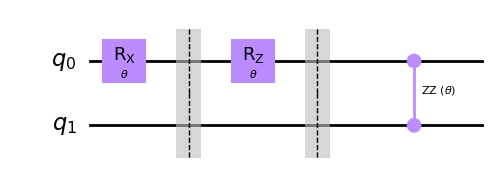

In [2]:
from qiskit.circuit import QuantumCircuit, Parameter
from qiskit.compiler import transpile

theta = Parameter("$\\theta$")
qc = QuantumCircuit(2)
qc.rx(theta, 0)
qc.barrier()
qc.rz(theta, 0)
qc.barrier()
qc.rzz(theta, 0, 1)
qc.draw()

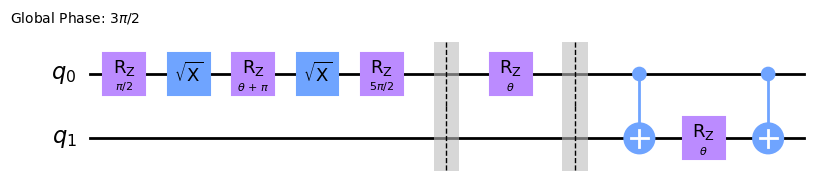

In [3]:
basis_gates = ['id', 'rz', 'sx', 'x', 'cx', 'reset'] # see Notebook 3

qc_transpiled = transpile(qc, basis_gates=basis_gates)
qc_transpiled.draw()

Note that the $\RZ$ gate is a virtual gate, see [link1](https://qiskit.org/documentation/stable/0.39/stubs/qiskit.circuit.library.RZGate.html#qiskit.circuit.library.RZGate), [link2](https://arxiv.org/abs/1612.00858), and let us thus call the set of basis gates without $\RZ$ the **hardware gates**. Then, we see that $\RX$ requires two single-qubit hardware gates, the $\RZ$ gate needs none, and $\RZZ$ needs **two two-qubit hardware gates** (i.e. the two $\CNOT$ gates). Recalling from Notebook 3 that the **$\CNOT$ gate** is the **most erroneous hardware gate** (around one magnitude higher error rate than the two single qubit gates) explains why we have to lay our focus on the $\RZZ$ gates when analyzing how well a QAOA circuit can be executed on real quantum hardware.

## $\CNOT$ Gates and Coupling Map

Recall from Notebook 3 that not all qubits in a quantum computer are connected with each other (see coupling map below). So, let's see how a $\CNOT$ gate is transpiled for two qubits that are not connected.

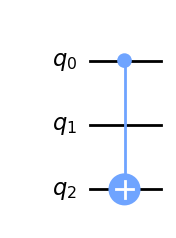

In [4]:
qc = QuantumCircuit(3)
qc.cx(0, 2)
qc.draw()

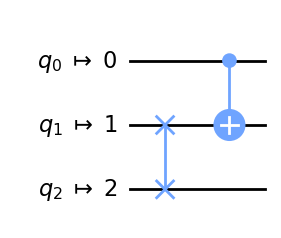

In [5]:
coupling_map=[[0, 1], [1, 0], [1, 2], [2, 1]] # Only qubits 0-1, 1-2 are connected.
qc_transpiled = transpile(qc, coupling_map=coupling_map, initial_layout=[0, 1, 2], seed_transpiler=123)
qc_transpiled.draw()

We see that the transpiler needs to insert a $\SWAP$ gate between qubits 1 and 2 in order to realize the $\CNOT$ gate between qubits 0 and 2. Clearly, this raises the question how a $\SWAP$ gate is transpiled to basis gates:

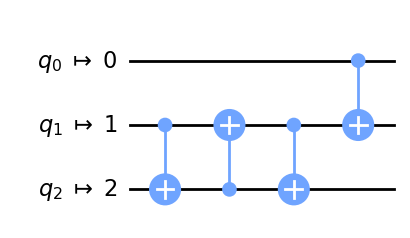

In [6]:
qc_transpiled = transpile(qc_transpiled, coupling_map=coupling_map, initial_layout=[0, 1, 2], basis_gates=basis_gates, seed_transpiler=123)
qc_transpiled.draw()

We see that a **$\mathrm{SWAP}$ gate** requires **three $\CNOT$ gates**! Having in mind the limited coupling map of current (IBM) quantum computers it is easy to imagine that the denser the QUBO matrix $A$ is populated (i.e. the more non-zero entries) the more $\mathrm{SWAP}$ gates (and therefore $\CNOT$ gates) are needed because many $\RZZ$ gates between many different qubits have to transpiled.

Now, let us observe these effects on our examples.

## Example Series 1

### Sparsity Pattern of QUBO Matrix

Recall example series 1:

<img src="images/notebook_4_example_1.png" width=450 />

Here is how the sparsity pattern of the QUBO matrices look like:

<img src="images/sparsity_qubo_matrix/ex1.png" width=450>

For these simple examples we can easily derive the structure of the QUBO matrices: We need to represent the charging level of the car for every time slot 0, 1, 2 and 3. Since we have 4 charging levels we need 2 qubits to represent the charging level for every time slot. So, we need 4 $\cdot$ 2 = 8 qubits for every example in example series 1.

In the plot for example1p0 you can see that we only have a coupling (off-diagonal element) between qubits 0 - 1, 2 - 3, 4 - 5, and 6 - 7. Every two qubit pair represents the charging level for a time slot. Since the car in this example is only at the charging station at time slot 0 no coupling between the different time slots is necessary. This changes for example1p1 where we see a coupling between qubits 0 - 1 - 2 - 3. This stems from the fact that in this example the car is at the charging station at time slots 0 and 1 and thus also the qubits involved must be coupled. And so it goes on until example1p3 where the car is at the charing station for all the time slots and we observe a full coupling between the qubits.

Now, let us investigate how the sparsity pattern of the different examples affect the count of basis gates for QAOA with $p=1$.

### Gate Count: Fully Connected Topology

First, let us assume that we have a **fully connected topology**, i.e. each qubit is connected with all other qubits. In the following figure we plot the number of hardware gates, i.e. of $\X$, $\SX$ and $\CNOT$ (in qiskit: `x`, `sx` and `cx`), and the depth of the circuit for all subexamples of example series 1. 

<img src="images/number_gates/example_1_p1_fully_connected.svg" />

We see that the number of $\CNOT$ gates grows whereas the number of single qubit gates stays constant. The reason is that the subexamples only differ in the number of time slots that the car is at the charging station and (as we discussed above) this directly affects the number of $\RZZ$ gates which then directly translate to the number of $\CNOT$ gates.

Remark: If you are interested in the depth of the circuit you can look at plots before and after transpilation in the folder `images\transpiled_circuits`.

---
Code snippet:
```python
backend_basis_gates = ["id", "rz", "sx", "x", "cx", "reset"] # see Notebook 3
backend_single_qubit_basis_gates = ["sx", "x"]

qaoa_ansatz_transpiled = transpile(
    qaoa_ansatz,
    basis_gates=backend_basis_gates,
    optimization_level=0) # has no effect in this case

number_cnots = qaoa_ansatz_transpiled.count_ops()['cx']
number_sx_x = count_gates(qaoa_ansatz_transpiled, backend_single_qubit_basis_gates) # count_gates is provided in utils
depth = qaoa_ansatz_transpiled.depth()
```

---

### Gate Count: ibmq_ehningen

Next, we transpile the QAOA circuits for our example series to the **ibmq_ehningen backend**. The hardware gates are the same as above but recall the **limited connectivity between the qubits** (see coupling map below) that makes it necessary to introduce $\SWAP$ gates (which we have seen are transpiled to three $\CNOT$ gates).

<img src="images/images_ibmq_ehningen/coupling_map_ibmq_ehningen.png" width=450 />

Here are the results for example series 1 transpiled to ibmq_ehningen:

<img src="images/number_gates/example1_p1_ehningen.png" width=650/>

As discussed in Notebook 3 there are many parameters to **control the transpilation process**. Two important ones are the **`optimization_level`** and the **`seed_transpiler`**. For the later we already explained that it controls the stochatic parts of the transpilation process. Looking at the figures above we see that this can make a significant difference. As demonstrated in Notebook 3 it is thus a **good practice** to run a transpilation several times and **choose the circuit with the least $\CNOT$ gates**. Moreover, we see that a transpilation can be done in many different ways and so has much potential for optimization. This is controlled with the `optimization_level`. The higher the number, the more optimized the transpiled circuit is but at the expense of more computation time. We refer to [link1](https://qiskit.org/documentation/apidoc/transpiler.html), [link2](https://qiskit.org/documentation/tutorials/circuits_advanced/04_transpiler_passes_and_passmanager.html) and [link3](https://quantum-enablement.org/how-to/compiling/compiling.html) for further information. Looking at the severe restriction of NISQ hardware we would recommand `optimization_level=3` in order to obtain the best circuits and take the most of the current potential.

---
Code snippet:
```python
ibmq_ehningen = provider.get_backend("ibmq_ehningen")
backend_coupling_map = ibmq_ehningen.configuration().coupling_map
backend_basis_gates = ibmq_ehningen.configuration().basis_gates

seeds_for_transpiler = [k for k in range(50)]
number_seeds_for_transpiler = len(seeds_for_transpiler)

quantum_circuit_transpilations = transpile(
    [qaoa_ansatz]*number_seeds_for_transpiler,
    coupling_map=backend_coupling_map,
    basis_gates=backend_basis_gates,
    optimization_level=3, # 0, 1, 2 or 3
    seed_transpiler=seeds_for_transpiler)
```
---

### Gate Count: Comparison

As a last plot for example series 1 let us **compare** the **number of $\CNOT$ gates** between the **fully connected topology and ibmq_ehningen**:

<img src="images/number_gates/example1_p1_fully_connected_vs_ehningen.svg" />

We see that the difference in the number of $\CNOT$ gates **diverges** from example_1p1 over example_1p2 to example_1p3. This has to following reason: the **coupling between the variables** (i.e. the non-zero entries in the QUBO matrix) increases from example_1p1 to example_1p3 and this means we have $\RZZ$ gates between increasingly many qubits. The more qubits are connected via a $\RZZ$ the more $\SWAP$ gates have to be used in order to compensate for the limited connectivity of ibmq_ehningen and thus the divergence.

## Example Series 2

Now, we report the figures for example series 2 for the same experiments as for example series 1. We will observe the same effects and thus will only make a few comments.

### Sparsity Pattern of QUBO Matrix

Recall example series 2:

<img src="images/notebook_4_example_2.png" width=450 />

Sparsity pattern of the QUBO matrices:

<img src="images/sparsity_qubo_matrix/ex2.png" width=550/>

Note the following differences to examples series 1: Clearly, we now need 16 qubits: 8 qubits for the green car and 8 qubits for the orange car. Moreover, note that we have coupling of qubits 0-1-8-9, 2-3-10-11, 4-5-12-13, 6-7-14-15. These are needed for every time slot to add the charging level for the green and the orange car. Altogether we see a more complicated sparsity pattern of the QUBO matrix and expect that this will translate to deeper circuits with more gates and eventually a poorer quality from real quantum computer results.

### Gate Count: Fully Connected Topology

<img src="images/number_gates/example_2_p1_number_gates.svg" />

### Gate Count: ibmq_ehningen

<img src="images/number_gates/example2_p1_ehningen.png" width=700/>

### Gate Count: Comparison

<img src="images/number_gates/example2_p1_fully_connected_vs_ehningen.svg" />

In this figure we see the divergence in the number of $\CNOT$ gates between a fully connected quantum computer and ibmq_ehningen even stronger than in example series 1.

In the last part of this notebook we present results from solving from example series 1 and 2 with QAOA on ibmq_ehningen.

# Results QAOA on ibmq_ehnigen

Our set up for the experiments reported below is the following:
- We use the **best parameters** $\vec{\beta}$, $\vec{\gamma}$ and $\varrho$ that we found in our simulator experiments in Section Classical Optimization. Thus, we can observe the **performance of ibmq_ehningen** for the **best possible QAOA circuits**.
- We **transpile** the QAOA circuits with **75 different seeds** and **optimization level 3**. This transpilation is abbreviated with $\mathrm{std}$ in the figures below.
- We additionally add **dynamical decoupling** to the transpiled circuits (abbreviation then is $\mathrm{dd}$).
- We employ **measurement error mitigation** to the $\mathrm{std}$ and $\mathrm{dd}$ circuits via the package `mthree` (abbreviation then is $\mathrm{xx\_mit}$, where $\mathrm{xx}$ = $\mathrm{std}$ or $\mathrm{dd}$)

For more information on the error mitigation techniques see Notebook 3.

## Quality Metric

### Fidelity

We measure the quality of the probability distribution $\{q_i\}$ stemming from running the QAOA circuit on **ibmq_ehningen** by computing the **fidelity** $F$ with respect to the probability distributions $\{p_i\}$ from an **exact state vector simulation**. Thereby, the fidelity is defined as

$$
F( \{p_i\}, \{q_i\}) = \sum_i \sqrt{p_i q_i} \ ,
$$

see further [1, Chapter 9]. We note that the fidelity is between $0$ and $1$, where $0$ is the worst case and $1$ is the best case. In `qiskit` the fidelity can be computed via `qiskit.quantum_info.hellinger_fidelity`, see [link](https://qiskit.org/documentation/stubs/qiskit.quantum_info.hellinger_fidelity.html#qiskit.quantum_info.hellinger_fidelity).

---
Code snippet:
```python
from qiskit.quantum_info import hellinger_fidelity

# See the end of Notebook 3 for experiment_df
fidelity = hellinger_fidelity(
    experiment_df["probability_exact"].to_dict(), experiment_df["probability"].to_dict())
```
---

### Expectation Value

In Notebook 2 we explained that the expectation value

$$
e(\vec{\beta}, \vec{\gamma})
=
\langle \psi_\mathrm{QAOA}(\vec{\beta}, \vec{\gamma}) | \HP |\psi_\mathrm{QAOA}(\vec{\beta}, \vec{\gamma}) \rangle
$$

is connected to the QUBO cost function $f_3$ by

$$
e(\vec{\beta}, \vec{\gamma})
= \sum_{b \in \{0, 1\}^n}
|\lambda_{b}(\vec{\beta}, \vec{\gamma})|^2 f_3(\vec{b}) \ ,
$$

where the amplitudes $\lambda_{b}(\vec{\beta}, \vec{\gamma})$ belong to the state $|\psi_\mathrm{QAOA}(\vec{\beta}, \vec{\gamma}) \rangle$, i.e.

$$
|\psi_\mathrm{QAOA}(\vec{\beta}, \vec{\gamma}) \rangle 
= \sum_{\vec{b} \in \{0, 1\}^n}
\lambda_{b}(\vec{\beta}, \vec{\gamma}) |b\rangle \ .
$$

This means a low expectation value $e$ indicates that the QAOA generates a quantum state $|\psi_\mathrm{QAOA}(\vec{\beta}, \vec{\gamma}) \rangle$ with **large amplitudes** for **bit strings** $b$ with **low cost** $f_3(\vec{b})$. Thus, measuring $e$ is a meaningful quality metric, in particular if one compares it to the minimum value of $f_3$, i.e. $\min_{\vec{b} \in \{0, 1\}^n} f_3(\vec{b})$.

## Fidelity, Example Series 1, $p=1$

<img src="images/fidelities/example1_p1_2022_09_02.png"/>

In the upper three plots we can clearly see the influence of the number of $\CNOT$ gates. On the left, we see that a **moderate number of $\CNOT$s** leads to a **fairly high fidelity** - with and without dynamical decoupling. We see some outliers but in general all transpilations lead to a good quality (the variance between results is small). In the middle we see that for circuits with **more $\CNOT$s** the **fidelity** for the **standard transpilation drops significantly**. There are still some circuits that lead to medium fidelities but also many with poor performance, i.e. the variance of the results is very high. However, the **circuit depth** seems to be **low enough** so that **dynamical decoupling can mitigate many errors** and yields considerably better results. On the right plot we see **$\CNOT$ numbers** that are **definitely too high for ibmq_ehningen** so that without dynamical decoupling the **fidelity is poor for all transpilations**. Adding dynamical decoupling can in some cases give better results but looking at the high variance we see that there is no guarantee that it works.

## Fidelity, $p=1$, Different Dates

The **error rates** of quantum computers are not static but **significantly change over time**. In the following figures we observe that this has a **drastic effect** on the **quality** of the results obtained from ibmq_ehningen.

### Exampe1p1

<img src="images/fidelities/example1p1_p1_2022_09_010205.png" />

### Exampe1p2

<img src="images/fidelities/example1p2_p1_2022_09_010205.png" />

Seeing how drastically the quality of our results changes from day to day we recommand running experiments on a series of different dates and (if possible) on different quantum computers.

## Fidelity and Expectation Value, $p=1$ and $p=2$

In this section we want to analyze the effect of the parameter $p$. In particular, we are interested in the **trade-off** between **better approximation quality** but **longer circuits** that come with higher values for $p$.

### Example1p1

<img src="images/expectations/example1p1_p1_2_2022_09_01_fid_exp.png" width=600 />

For the simplest that we consider (i.e.  example1p1) we see in the upper figure that choosing $p=2$ gives the better result (in terms of lower expecation value). In theory this is expected, compare the dashed lines in the two lower plots. However, in practice on real quantum computers the deeper circuits for $p=2$ could be a problem, but for the example at hand the circuits are shallow enough that we don't run into prolems when executing them on ibmq_ehningen. This will change in the next examples.

### Example1p2

<img src="images/expectations/example1p2_p1_2_2022_09_01_fid_exp.png" width=600 />

Already in example1p2 we see that the trade-off between better theoretical solution and practical result speak rather in favor of $p=1$. For this choice we get more reliable a solution with good expectation value. Choosing $p=2$ might give a better solution but looking at the high variance this is pretty uncertain.

### Example1p3

<img src="images/expectations/example1p3_p1_2_2022_09_01_fid_exp.png" width=600 />

For example1p3 the situation is clear: The QAOA circuits for $p=2$ are too deep for ibmq_ehningen so that no meaningful result can be obtained.

## Number $\CNOT$ Gates vs. Fidelity

As last figures for example series 1 we present the number of $\CNOT$ gates in the circuit versus the fidelity that the circuit achieved.

### Example1p1

<img src="images/fidelities_vs_cnots/example1p1_p1_2_2022_09_01.png" />

Comparing the left and the right plots (i.e. comparing $p=1$ and $p=2$) we see that circuits with more $\CNOT$ gates give results with a lower fidelity. Moreover, we see in the top plots that for the standard transpilation we don't have the expected decrease in fidelity when increasing the number of $\CNOT$s. In particular, in the top right plot we see the best results for a medium number of $\CNOT$ gates and a very poor quality for the lowest number of $\CNOT$s. The explanation is probably that the standard transpilation method is not aware of all kinds of errors that appear in a quantum device and thus did not choose the best qubits. A hint in this direction is also the remarkable fact that for the circuits with dynamical decoupling the fidelity stays nearly constant for the range of number of $\CNOT$ gates appearing in the examples here. It seems that dynamical decoupling removed the errors that spoiled the quality for the top plots.

For example1p2 and example1p3 below we make the same observations but additionally observe that dynamical decoupling and measurement error mitigation don't suffice to remove all appearing errors, see the plots with $\CNOT$ range between 40 and 150. (One reason might be cross-talk between the qubits). And for examples with more than 200 $\CNOT$ gates we don't get a meaningful solution at all.

### Example1p2

<img src="images/fidelities_vs_cnots/example1p2_p1_2_2022_09_01.png" />

### Example1p3

<img src="images/fidelities_vs_cnots/example1p3_p1_2_2022_09_01.png" />

### Example1p3: Different Dates

As mentioned above the error rates of quantum computers change significantly over time. The effect on the quality of our results is clearly visible in the plots below:

<img src="images/fidelities_vs_cnots/example1p3_p1_ehningen_2022_09_010205_dd.png" />

## Fidelity and Expectation Value, $p=1$ and $p=2$

We end this notebook with results for example2p1 and example2p4. For these examples we are in regimes of number of $\CNOT$ gates that are too much for current quantum computers. Thus, we see poor fidelities and expecation values that stay bounded away from an exact simulation and also from the exact solution.

### Example2p1

<img src="images\expectations\example2p1_p1_2_2022_09_01_fid_exp.png" width=600/>

### Example2p4

<img src="images\expectations\example2p4_p1_2_2022_09_01_fid_exp.png" width=600/>

# Literature <a class="tocSkip">

[1] Nielsen, M. A. and Chuang, I. L. 2010. Quantum computation and quantum information.
Cambridge University Press, Cambridg

---
Author: Andreas Sturm, andreas.sturm@iao.fraunhofer.de

(c) Fraunhofer IAO

---

**Copyright 2023 Andreas Sturm, Fraunhofer IAO**

Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at

http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.